# Projet de Machine Learning Réalisé par : Sekou DICKO

----

# DataSet : 

Pour le projet qui m'a été affecté, j'ai deux DataSet : 

- **audit_risk.csv**

- **trial.csv**

Les deux DataSet sont sur le même contexte et sont à peu près pareils à quelques variables près.

Dans cette étude, j'ai choisi de travailler avec **audit_risk.csv** qui a un nombre de variables plus élevé par rapport à l'autre.

# Objectif de l'étude :

Proposer un **modèle de machine learning** prédisant si une entreprise est frauduleuse ou non à la base des données d'audit de certaines entreprises récoltées par les auditeurs dans le but d'aider ces derniers.

Pour évaluer le modèle, nous allons nous baser sur la métrique **Précision** réduisant au maximum le taux de faux positifs. 

Nous avons choisi cette métrique pour deux raisons :

- Le DataSet est **déséquilibré** par rapport aux deux classes.


- Pour éviter les entreprises innocentes d'être accusées frauduleuses.

# I. Approche classique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Options pour éviter les warnings et faire apparaitre toutes les lignes et colonnes du DataSet

pd.set_option("display.max_row", 776)
pd.set_option("display.max_column", 27)
warnings.filterwarnings("ignore")

In [3]:
# Lecture du DataSet 

data = pd.read_csv("audit_risk.csv")

In [4]:
data.head(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0


In [5]:
data.tail(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
774,55.57,18,0.2,0.2,0.04,0.0,0.2,0.0,0.2,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0
775,55.57,15,0.0,0.2,0.00,0.0,0.2,0.0,0.0,5.0,0.2,1.0,0.32,0.2,0.064,2,0.2,0.4,0,0.2,0.0,2.0,1.464,0.4,0.5,0.2928,0


## 1. Analyse exploratoire des données

In [6]:
# Copie du DataSet 

audit_data = data.copy()

## 1.1 Analyse de la forme des données 

- Variable cible (target variable) : **Risk** 

In [7]:
audit_data.shape

(776, 27)

- **Forme de la table de données :**

    - Lignes : **776**
    
    - Colonnes : **27**
    
Dans notre DataSet, nous avons **27 variables** dont 26 features et une variable cible à prédire.

In [8]:
audit_data.dtypes.value_counts()

float64    23
int64       3
object      1
dtype: int64

- **Types de variables dans le DataSet** :

    - Variable qualitative : **1**
    
    - Variables quantitatives : **26**

In [9]:
audit_data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


<AxesSubplot:>

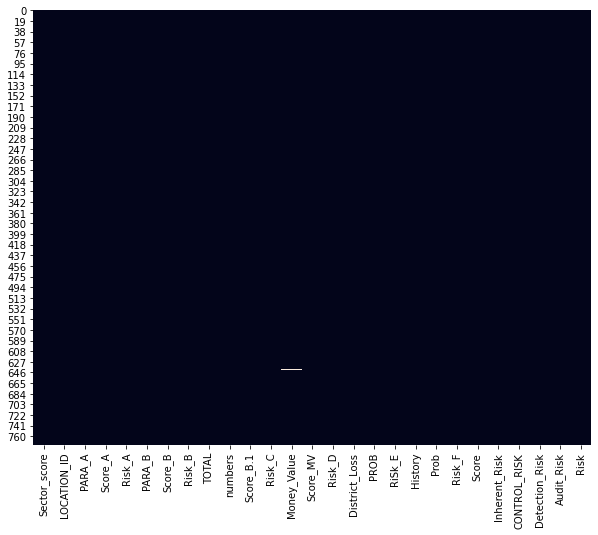

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(audit_data.isna(), cbar=False)

In [11]:
audit_data.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

- **Analyse de valeurs manquantes :**

    - Dans le DataSet, nous avons une seule **valeur manquante** pour la variable  **Money_Value**.

## 1.2 Analyse de fond 

In [12]:
(audit_data["Risk"].value_counts(normalize=True))*100

0    60.695876
1    39.304124
Name: Risk, dtype: float64

<AxesSubplot:xlabel='Risk', ylabel='count'>

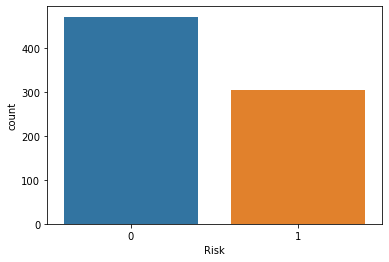

In [13]:
sns.countplot(audit_data["Risk"])

- **Visualisation de la target :** 

    - **40% des sociétés** de notre Dataset sont **frauduleuses**.

In [14]:
audit_data.corr(method="pearson").style.format("{:.2}").\
background_gradient(cmap=plt.get_cmap("Greens"), axis=1)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092,-0.39
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22,0.38
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.3,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2,0.62
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.27,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22,0.39
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89,0.26
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.38,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21,0.64
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89,0.26
TOTAL,-0.15,0.27,0.3,0.27,0.99,0.38,0.99,1.0,0.22,0.24,0.23,0.17,0.34,0.17,0.093,0.046,0.089,0.21,0.33,0.2,0.43,0.69,0.2,nan,0.89,0.29
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,0.22,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22,0.31
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.24,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26,0.35


- **Les variables les plus corrélées linéairement avec la target sont** : Score,  Score_MV, Score_B, Score_A.


- **Detection_Risk** n'a aucune corrélation linéaire avec les autres variables. 

In [15]:
audit_data.corr(method="spearman").style.format("{:.2}").\
background_gradient(cmap=plt.get_cmap("coolwarm"), axis=1)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.0,-0.38,-0.38,-0.38,-0.13,-0.096,-0.13,-0.31,-0.072,-0.072,-0.072,-0.17,-0.13,-0.17,-0.15,-0.088,-0.15,-0.048,-0.048,-0.048,-0.3,-0.33,-0.16,nan,-0.33,-0.27
PARA_A,-0.38,1.0,0.91,1.0,0.53,0.55,0.53,0.82,0.28,0.28,0.28,0.46,0.45,0.46,0.085,0.1,0.12,0.27,0.27,0.27,0.72,0.74,0.21,nan,0.7,0.57
Score_A,-0.38,0.91,1.0,0.91,0.54,0.56,0.54,0.79,0.29,0.29,0.29,0.48,0.49,0.48,0.079,0.1,0.11,0.28,0.28,0.28,0.77,0.75,0.21,nan,0.71,0.61
Risk_A,-0.38,1.0,0.91,1.0,0.53,0.55,0.53,0.82,0.28,0.28,0.28,0.46,0.45,0.46,0.085,0.1,0.12,0.27,0.27,0.27,0.72,0.74,0.21,nan,0.7,0.57
PARA_B,-0.13,0.53,0.54,0.53,1.0,0.83,1.0,0.85,0.32,0.32,0.32,0.58,0.55,0.58,-0.039,0.056,-0.0032,0.3,0.3,0.3,0.72,0.72,0.14,nan,0.68,0.59
Score_B,-0.096,0.55,0.56,0.55,0.83,1.0,0.84,0.78,0.33,0.33,0.33,0.58,0.57,0.58,-0.00059,0.09,0.039,0.32,0.32,0.32,0.82,0.71,0.18,nan,0.68,0.63
Risk_B,-0.13,0.53,0.54,0.53,1.0,0.84,1.0,0.85,0.32,0.32,0.32,0.57,0.54,0.58,-0.039,0.056,-0.0033,0.3,0.3,0.3,0.73,0.72,0.14,nan,0.68,0.59
TOTAL,-0.31,0.82,0.79,0.82,0.85,0.78,0.85,1.0,0.32,0.32,0.32,0.59,0.55,0.59,0.022,0.095,0.061,0.3,0.3,0.3,0.84,0.86,0.19,nan,0.81,0.65
numbers,-0.072,0.28,0.29,0.28,0.32,0.33,0.32,0.32,1.0,1.0,1.0,0.42,0.51,0.42,0.14,0.054,0.14,0.23,0.23,0.23,0.46,0.42,0.21,nan,0.42,0.37
Score_B.1,-0.072,0.28,0.29,0.28,0.32,0.33,0.32,0.32,1.0,1.0,1.0,0.42,0.51,0.42,0.14,0.054,0.14,0.23,0.23,0.23,0.46,0.42,0.21,nan,0.42,0.37


- **Les variables les plus corrélées dans le sens de spearman avec la target sont** : Score, Inherent_Risk, Audit_Risk.


- **Detection_Risk** n'a aucune corrélation non linéaire avec les autres variables.


Les **features** sont **mutuellement corrélés** entre eux. Ces **corrélations** peuvent être observées sur les deux **tableaux de corrélation** ci-dessus. Lire ces tableaux n'est pas évident. Par conséquent, pour observer facilement ces corrélations, nous jugeons nécessaire de faire une **ACP**. Cette analyse permettra également de visualiser les entreprises dans le premier plan factoriel.

In [16]:
import ACP

In [17]:
X = data.drop("LOCATION_ID", axis=1).drop("Detection_Risk", axis=1)
X["Money_Value"] = X["Money_Value"].fillna(X["Money_Value"].median())

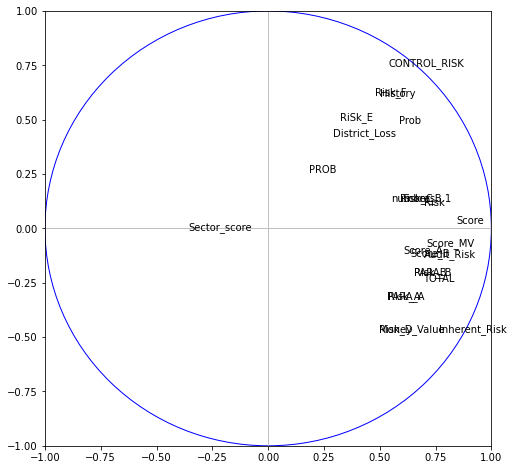

'Cercle des correlations'

In [18]:
ACP.acp_cercle_correlation(X)

'Individus dans le premier plan factoriel'

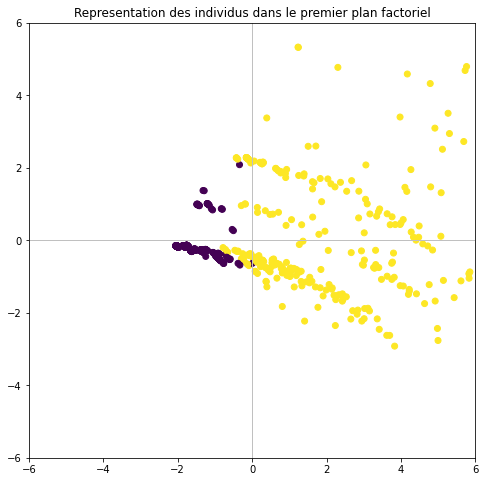

In [19]:
ACP.acp_representation_individus(X)

In [20]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, classification_report

from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

## 2. Pre-processing

Dans cette partie, nous allons effectuer : 

- l'**imputation** pour traiter la seule valeur manquante de notre DataSet.


- la **suppression** des variables inutiles.


- Le **découpage** du DataSet en TrainSet et TestSet.

    - On va prendre **20% du DataSet** comme **TestSet**

In [21]:
def imputation(df) : 
    
    """
    Fonction permettant d'imputer la seule valeur manquante de la variable Money_Value de notre DataSet 
    en la remplaçant par la valeur mediane.
    
    Parametre : DataFrame
    
    Retour : DataFrame
    
    """
    
    df["Money_Value"] = df["Money_Value"].fillna(df["Money_Value"].median())
    
    return df

In [22]:
def pre_processing(df):
    
    """
    Fonction permettant de faire le pre-processing sans prendre en compte les opérations de transformations
    des données telles que la normalisation qui sera effectuée par le biais d'un pipeline. 
    
    Fonction faisant appel à la fonction imputation. 
    
    Fonction supprimant les variables non utiles du DataSet :
    
        - TOTAL qui n'est qu'une somme de PARA_A et PARA_B
        
        - LOCATION_ID qui n'a aucune influence sur notre apprentissage
        
        - Detection_Risk qui n'a aucune relation avec les autres variables
    
    Paramètre : DataFrame
    
    Retour : DataFrames
    
    """
    
    df = imputation(df)
    
    df = df.drop("TOTAL", axis=1)
    
    df = df.drop("LOCATION_ID", axis=1)
    
    df = df.drop("Detection_Risk", axis=1)
        
    train_set, test_set = train_test_split(df, test_size=0.2, random_state=19)
    
    X_train = train_set.drop("Risk", axis=1)
    y_train = train_set["Risk"]
    
    X_test = test_set.drop("Risk", axis=1)
    y_test = test_set["Risk"]
    
    print("\nTrain Set \n\n{}".format(y_train.value_counts()))
    print("\n-------------------------------")
    print("\nTest Set \n\n{}".format(y_test.value_counts()))
    
    return X_train,y_train,X_test,y_test

In [23]:
X_train,y_train,X_test,y_test = pre_processing(audit_data)


Train Set 

0    379
1    241
Name: Risk, dtype: int64

-------------------------------

Test Set 

0    92
1    64
Name: Risk, dtype: int64


## 3. Modélisation

Dans cette partie, tout d'abord nous allons définir une **procédure d'évaluation** pour évaluer les modèles. Par la suite, nous allons considérer un **ensemble de modèles**. Puis choisir un modèle parmi cet ensemble sur la base des **performances** et le **nombre de features utilisés**. Ensuite, nous allons procéder à l'**optimisation** du modèle choisi.

## 3.1 Procedure d'evaluation

In [24]:
def evaluation(model, nom_model):
    
    """
    procédure permettant d'entrainer et évaluer le modèle.
    
    Parametre : model, String
    
    """
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    cross_validation = cross_val_score(model, X_train, y_train, cv=4, scoring="precision")
    
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print("Cross validation scoring precision sur Train Set : {}".format(round(cross_validation.mean(),4)))
    print("\n")
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))

    
    plt.figure(figsize=(8,4))
    plt.title("Courbe d'apprentissage ---- {}".format(nom_model))
    plt.plot(N, train_score.mean(axis=1), label="train score")
    plt.plot(N, val_score.mean(axis=1), label="validation score")
    plt.xlabel("Nombre d'echantillons")
    plt.ylabel("Score f1")
    plt.legend()
    plt.show()

## 3.2 Modèles d'apprentissage

In [25]:
# ensemble de modèles 

KNN = KNeighborsClassifier()

Logistic_Regression = make_pipeline(StandardScaler(),
                                    LogisticRegression(random_state=1995))
    
RandomForest_Classifier = make_pipeline(StandardScaler(),
                                        RandomForestClassifier(random_state=1995))
    
GradientBoosting_Classifier = make_pipeline(StandardScaler(),
                                            GradientBoostingClassifier(random_state=1995))

SVM = make_pipeline(StandardScaler(),
                    SVC(random_state=1995))

In [26]:
models = {"KNN":KNN,
          "Logistic Regression":Logistic_Regression,
          "Random Forest Classifier":RandomForest_Classifier,
          "Gradient Boosting Classifier":GradientBoosting_Classifier,
          "SVM":SVM}


 					========= KNN ==========

[[92  0]
 [ 3 61]]


Cross validation scoring precision sur Train Set : 0.9871


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        92
           1       1.00      0.95      0.98        64

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



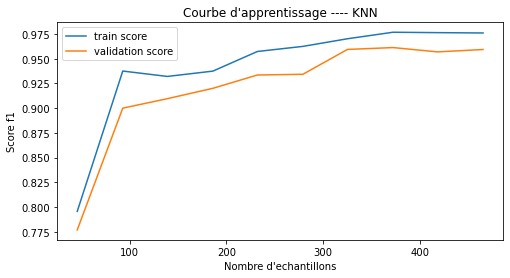


 					========= Logistic Regression ==========

[[92  0]
 [ 2 62]]


Cross validation scoring precision sur Train Set : 0.9832


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        92
           1       1.00      0.97      0.98        64

    accuracy                           0.99       156
   macro avg       0.99      0.98      0.99       156
weighted avg       0.99      0.99      0.99       156



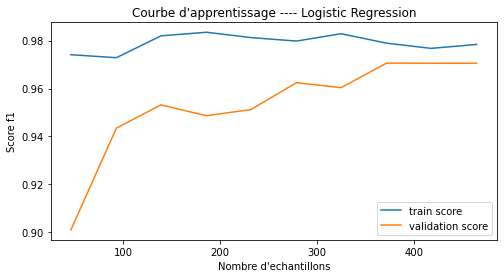


 					========= Random Forest Classifier ==========

[[92  0]
 [ 0 64]]


Cross validation scoring precision sur Train Set : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        64

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



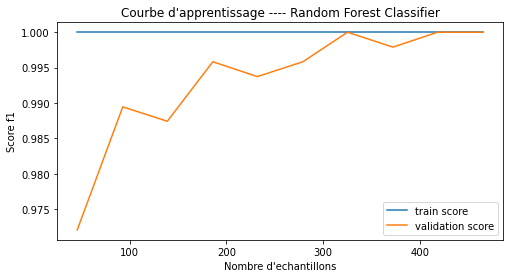


 					========= Gradient Boosting Classifier ==========

[[92  0]
 [ 0 64]]


Cross validation scoring precision sur Train Set : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        64

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



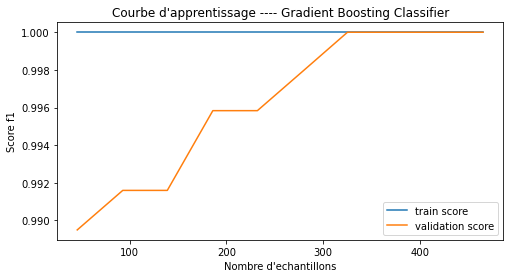


 					========= SVM ==========

[[92  0]
 [ 3 61]]


Cross validation scoring precision sur Train Set : 0.9829


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        92
           1       1.00      0.95      0.98        64

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



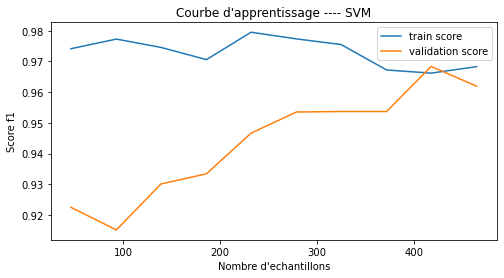

In [27]:
for nom_model, model in models.items():
    
    print("\n \t\t\t\t\t========= {} ==========\n".format(nom_model))
    evaluation(model, nom_model)

## 3.3 Conclusion de la partie modélisation

### Features Importance

In [28]:
features = audit_data.drop("Risk",axis=1).\
drop("Detection_Risk", axis=1).\
drop("LOCATION_ID", axis=1).\
drop("TOTAL", axis=1).columns

Text(0.5, 1.0, 'GradientBoostingClassifier')

<Figure size 720x360 with 0 Axes>

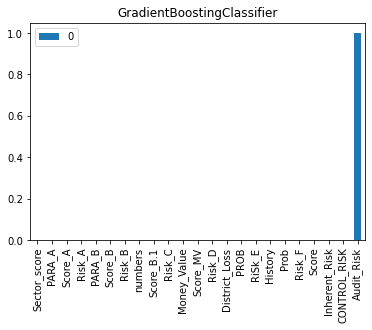

In [29]:
plt.figure(figsize=(10,5))
pd.DataFrame(GradientBoosting_Classifier[1].feature_importances_, index=features).plot.bar()
plt.title("GradientBoostingClassifier")

Text(0.5, 1.0, 'RandomForestClassifier')

<Figure size 720x360 with 0 Axes>

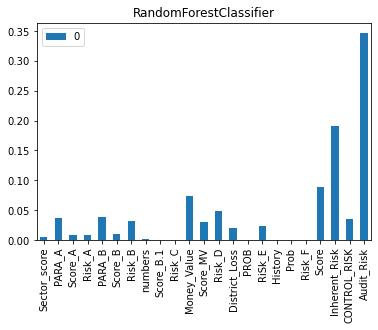

In [30]:
plt.figure(figsize=(10,5))
pd.DataFrame(RandomForest_Classifier[1].feature_importances_, index=features).plot.bar()
plt.title("RandomForestClassifier")

In [31]:
# Statistique sur les entreprises frauduleuses ----> variable : Audit_Risk


print("Entreprises frauduleuses : ")

((audit_data[audit_data["Risk"]==1]).describe())["Audit_Risk"]

Entreprises frauduleuses : 


count    305.000000
mean      17.594018
std       60.265935
min        1.014400
25%        1.907600
50%        5.389600
75%       15.683200
max      961.514400
Name: Audit_Risk, dtype: float64

In [32]:
# Statistique sur les entreprises non frauduleuses ----> variable : Audit_Risk

print("Entreprises non frauduleuses : ")

((audit_data[audit_data["Risk"]==0]).describe())["Audit_Risk"]

Entreprises non frauduleuses : 


count    471.000000
mean       0.416806
std        0.186206
min        0.280000
25%        0.296600
50%        0.331200
75%        0.423200
max        0.994800
Name: Audit_Risk, dtype: float64


Nous pouvons dire que tous les **modèles candidats** présentent de meilleures performances.

Nous avons deux modèles qui ont atteint un score de 100% :

- **GradientBoostingClassifier**


- **RandomForestClassifier**

En observant les **features importance** données ci-dessus issue de ces deux meilleurs modèles, on remarque très rapidement une grande différence : 

Pour le modèle **GradientBoostingClassifier** un seul feature **Audit_Risk** a été utilisé contrairement au modèle **RandomForestClassifier** pour lequel plusieurs features ont été utilisés. Quoique même pour le Random Forest, **Audit_Risk** a la plus grande importance. Cela peut s'expliquer par le fait que ce feature est fortement corrélé avec la target et les autres features. En plus de cela, même avec les yeux (voir les deux cellules ci-dessus), on peut remarquer que : 

- Les entreprises **non frauduleuses** ont une valeur d'Audit_Risk **strictement inférieure** à 1


- Les entreprises **frauduleuses** ont une valeur d'Audit_Risk **strictement supérieure** à 1


Dans la suite, nous allons continuer avec le modèle **RandomForestClassifier**. Nous allons l'optimiser pour avoir au moins une bonne courbe d'apprentissage cohérente. 


## 4. Optimisation 

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
hyper_params = {"randomforestclassifier__n_estimators":[10, 50, 100, 150],
                "randomforestclassifier__max_depth":np.arange(1,3),
                "randomforestclassifier__criterion":["entropy", "geni"],
                "randomforestclassifier__max_features":[0.25, 0.5, 0.75, 1],
                "randomforestclassifier__min_samples_leaf":[8, 9, 10, 11],
                "randomforestclassifier__min_samples_split":[8, 9, 10]}

In [35]:
grid = GridSearchCV(RandomForest_Classifier, param_grid=hyper_params, cv=4)

In [36]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=1995))]),
             param_grid={'randomforestclassifier__criterion': ['entropy',
                                                               'geni'],
                         'randomforestclassifier__max_depth': array([1, 2]),
                         'randomforestclassifier__max_features': [0.25, 0.5,
                                                                  0.75, 1],
                         'randomforestclassifier__min_samples_leaf': [8, 9, 10,
                                                                      11],
                         'randomforestclassifier__min_samples_split': [8, 9,
                                                                       10],
                         'randomforestclassifier__n_estimators': [10

In [37]:
grid.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 1,
 'randomforestclassifier__max_features': 0.5,
 'randomforestclassifier__min_samples_leaf': 8,
 'randomforestclassifier__min_samples_split': 8,
 'randomforestclassifier__n_estimators': 10}

In [38]:
grid.best_score_

1.0

In [39]:
model = grid.best_estimator_

[[92  0]
 [ 0 64]]


Cross validation scoring precision sur Train Set : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        64

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



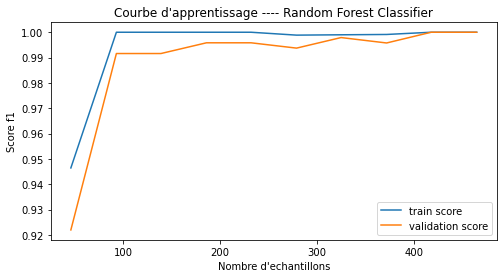

In [40]:
evaluation(model, "Random Forest Classifier")

Text(0.5, 1.0, 'RandomForestClassifier')

<Figure size 720x360 with 0 Axes>

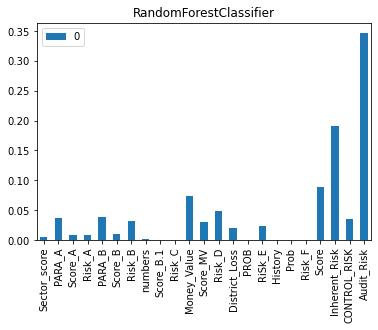

In [41]:
plt.figure(figsize=(10,5))
pd.DataFrame(RandomForest_Classifier[1].feature_importances_, index=features).plot.bar()
plt.title("RandomForestClassifier")

In [42]:
import pickle 

In [43]:
with open("model.data", "wb") as m : 
    
    pickle.dump(model, m)

## 5. Conclusion de l'étude et Perspective

- Nous avons un modèle de machine learning optimisé avec un score **precision** égale à **100%** sur le **TestSet**. Nous pouvons dire que notre **objectif de départ** a été atteint. Nous pouvons enlever du DataSet les variables qui ont une **feature importance** inferieure à un **seuil** à définir. 


- Pour aller plus loin, on pouvait faire une petite application pour déployer notre modèle. 


- Ce petit projet m'a permis de parcourir et d'acquérir les notions basiques du machine learning.


# II. Nouvelle tendance

Actuellement, il existe plusieurs **frameworks** qui permettent de faire de l'**autoML**. Il s'agit de partir des données et d'utiliser un algorithme pour trouver le **modèle le plus performant** et ses **hyperparamètres** adéquats aux données. Cette approche est très pratique si on a un DataSet pas trop complexe et pas trop grand. 

Dans le cas présent, nous allons utiliser le framework **TPOT** (pip install tpot) pour appliquer l'autoML sur notre DataSet.

In [44]:
from tpot import TPOTClassifier

In [45]:
pipeline_optimizer = TPOTClassifier()

In [46]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, scoring="precision", verbosity=2)

In [47]:
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)


TPOTClassifier(generations=5, population_size=20, random_state=42,
               scoring='recall', verbosity=2)

In [48]:
print(pipeline_optimizer.score(X_test, y_test))

1.0


In [49]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [50]:
from xgboost import XGBClassifier

In [51]:
exported_pipeline = XGBClassifier(learning_rate=0.001, 
                                  max_depth=9, 
                                  min_child_weight=7, 
                                  n_estimators=100, 
                                  n_jobs=1, 
                                  subsample=0.45, 
                                  verbosity=0)

[[92  0]
 [ 0 64]]


Cross validation scoring precision sur Train Set : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        64

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



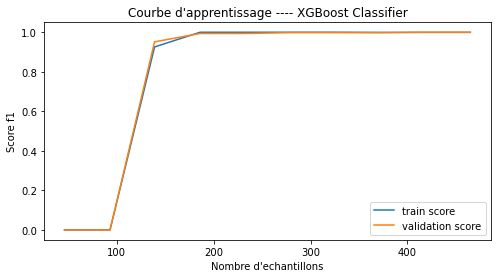

In [52]:
evaluation(exported_pipeline, "XGBoost Classifier")

- Dans notre cas, cette approche marche bien car notre **DataSet** est très simple.


- Le Framework utilisé est très puissant car il peut même faire une optimisation d'un modèle particulier donné comme **argument** c'est à dire ce que fait **GridSearchCV** et **RandomizedSearchCV**. Un exemple d'optimisation sur le modèle **RandomForest** est donné ci-dessous.

In [53]:
pipeline_optimizer = TPOTClassifier(template="RandomForestClassifier",generations=5, population_size=20, cv=5,
                                    random_state=42, scoring="precision", verbosity=2)

In [54]:
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42,
               scoring='precision', template='RandomForestClassifier',
               verbosity=2)